# PROJECT - Product Review of Apple iPhone 11 (128GB) - Black

### Import all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import bs4
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

###  Scrapping data from amazon.in

In [2]:
names = []
reviews = []
stars = []
reviews_title = []
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36"

accept = "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9"

for p in range(1,12):
    url = f'https://www.amazon.in/Apple-iPhone-11-128GB-Black/dp/B07XVLW7YK/ref=sr_1_2?dchild=1&qid=1595923755&refinements=p_6%3AA14CZOWI0VEHLG%7CA1P3OPO356Q9ZB%7CA2HIN95H5BP4BL%2Cp_89%3AApple&s=electronics&sr=1-2#customerReviews&pageNumber={p}'
    print(url)
    page = requests.get(url,headers={'User-Agent': user_agent, 'Accept': accept})
    html = page.content
    soup = bs4.BeautifulSoup(html, 'html.parser')
    if page.status_code == 200:
        for n in soup.find_all('span', attrs={'class': 'a-profile-name'}):
            names.append(n.text)
        for r in soup.find_all('div', attrs={'data-hook':"review-collapsed"}):
            reviews.append(r.text.strip())
        for rt in soup.find_all('a', attrs={'data-hook':"review-title"}):
            reviews_title.append(rt.text.strip())
        for s in soup.find_all('i', attrs={'data-hook':"review-star-rating"}):
            x=s.text.split()
            f= float(x[0])
            stars.append(f)
            
    else:
        print('page not found')

https://www.amazon.in/Apple-iPhone-11-128GB-Black/dp/B07XVLW7YK/ref=sr_1_2?dchild=1&qid=1595923755&refinements=p_6%3AA14CZOWI0VEHLG%7CA1P3OPO356Q9ZB%7CA2HIN95H5BP4BL%2Cp_89%3AApple&s=electronics&sr=1-2#customerReviews&pageNumber=1
https://www.amazon.in/Apple-iPhone-11-128GB-Black/dp/B07XVLW7YK/ref=sr_1_2?dchild=1&qid=1595923755&refinements=p_6%3AA14CZOWI0VEHLG%7CA1P3OPO356Q9ZB%7CA2HIN95H5BP4BL%2Cp_89%3AApple&s=electronics&sr=1-2#customerReviews&pageNumber=2
https://www.amazon.in/Apple-iPhone-11-128GB-Black/dp/B07XVLW7YK/ref=sr_1_2?dchild=1&qid=1595923755&refinements=p_6%3AA14CZOWI0VEHLG%7CA1P3OPO356Q9ZB%7CA2HIN95H5BP4BL%2Cp_89%3AApple&s=electronics&sr=1-2#customerReviews&pageNumber=3
https://www.amazon.in/Apple-iPhone-11-128GB-Black/dp/B07XVLW7YK/ref=sr_1_2?dchild=1&qid=1595923755&refinements=p_6%3AA14CZOWI0VEHLG%7CA1P3OPO356Q9ZB%7CA2HIN95H5BP4BL%2Cp_89%3AApple&s=electronics&sr=1-2#customerReviews&pageNumber=4
https://www.amazon.in/Apple-iPhone-11-128GB-Black/dp/B07XVLW7YK/ref=sr_1_2?d

### Convert scrap data into dataframe

In [3]:
len(reviews)

88

In [4]:
len(names)

88

In [5]:
len(stars)

88

In [6]:
len(reviews_title)

88

In [7]:
product_df=pd.DataFrame({
    'name':names,
    'review title':reviews_title,
    'reviews':reviews,
    'stars':stars,
})

In [8]:
product_df

,name,review title,reviews,stars
0,Suman Biswas,Keep away from Amazon when it's Apple.,May be my first negative review about the prod...,1.0
1,Sunny Kumar,First Time iPhone User Review :-),The iPhone design is good and the camera quali...,5.0
2,shanu Kumar,Solid premium phone from iphone,Awesome Phone. Nice upgrade from iPhone 6s to ...,5.0
3,Amazon Customer,Worst Experience Ever.!,My Phone is Producing Too Much Heat Even Didn’...,1.0
4,Satyapal singh,iPhone 11,"Defective product,got heat up within 5 minutes...",1.0
...,...,...,...,...
83,Amazon Customer,Worst Experience Ever.!,My Phone is Producing Too Much Heat Even Didn’...,1.0
84,Satyapal singh,iPhone 11,"Defective product,got heat up within 5 minutes...",1.0
85,Gurmeet singh,Defective Iphone 11,The product i got was defective . The face id ...,1.0
86,Ghar Sayan,Best iPhone ever | Super Night Mode | Super Ca...,"In my opinion, don’t think much about the pho...",5.0


In [9]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          88 non-null     object 
 1   review title  88 non-null     object 
 2   reviews       88 non-null     object 
 3   stars         88 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.9+ KB


In [10]:
product_df.head()

,name,review title,reviews,stars
0,Suman Biswas,Keep away from Amazon when it's Apple.,May be my first negative review about the prod...,1.0
1,Sunny Kumar,First Time iPhone User Review :-),The iPhone design is good and the camera quali...,5.0
2,shanu Kumar,Solid premium phone from iphone,Awesome Phone. Nice upgrade from iPhone 6s to ...,5.0
3,Amazon Customer,Worst Experience Ever.!,My Phone is Producing Too Much Heat Even Didn’...,1.0
4,Satyapal singh,iPhone 11,"Defective product,got heat up within 5 minutes...",1.0


### Removing Stop Words and Punctuations from Reviews 

In [11]:
reviews_string = ' '.join(map(str, reviews)) 

In [12]:
reviews_string

'May be my first negative review about the product & Amazon both. I was much elated to receive the iPhone 11 so fast, next day of dispatch i.e. 28/09/19, but the thing I got started heating up every now and then. Contacted Applecare, just to be consoled that it\'s quite normal. As it continued, tried to return the product by speaking to Amazon customer support but in vain. Some body called me back to convey that only Apple will decide which one to take back. Why is then Amazon took up the sacred duty of selling such an item which they can\'t exchange/ have no control ? The product developed new issues like proximity sensor malfunction and last but most importantly loosing mobile network every other minute(even had two software updates). It was handed over to the Apple ASP as the return window closed on 10/10/19 (what use it was for??) and diagnosed as having issues and has further been sent to Apple repair facility at Bengaluru. So I\'m here w/out my first iPhone after using it(sufferi

In [13]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JAY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JAY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
from nltk.tokenize import word_tokenize
import string

In [16]:
reviews_string=reviews_string.lower()
reviews_string=reviews_string.translate(str.maketrans('','',string.punctuation))

In [17]:
reviews_string

'may be my first negative review about the product  amazon both i was much elated to receive the iphone 11 so fast next day of dispatch ie 280919 but the thing i got started heating up every now and then contacted applecare just to be consoled that its quite normal as it continued tried to return the product by speaking to amazon customer support but in vain some body called me back to convey that only apple will decide which one to take back why is then amazon took up the sacred duty of selling such an item which they cant exchange have no control  the product developed new issues like proximity sensor malfunction and last but most importantly loosing mobile network every other minuteeven had two software updates it was handed over to the apple asp as the return window closed on 101019 what use it was for and diagnosed as having issues and has further been sent to apple repair facility at bengaluru so im here wout my first iphone after using itsuffering for just a little over 2 weeks 

In [18]:
words=word_tokenize(reviews_string, "english")
words

['may',
 'be',
 'my',
 'first',
 'negative',
 'review',
 'about',
 'the',
 'product',
 'amazon',
 'both',
 'i',
 'was',
 'much',
 'elated',
 'to',
 'receive',
 'the',
 'iphone',
 '11',
 'so',
 'fast',
 'next',
 'day',
 'of',
 'dispatch',
 'ie',
 '280919',
 'but',
 'the',
 'thing',
 'i',
 'got',
 'started',
 'heating',
 'up',
 'every',
 'now',
 'and',
 'then',
 'contacted',
 'applecare',
 'just',
 'to',
 'be',
 'consoled',
 'that',
 'its',
 'quite',
 'normal',
 'as',
 'it',
 'continued',
 'tried',
 'to',
 'return',
 'the',
 'product',
 'by',
 'speaking',
 'to',
 'amazon',
 'customer',
 'support',
 'but',
 'in',
 'vain',
 'some',
 'body',
 'called',
 'me',
 'back',
 'to',
 'convey',
 'that',
 'only',
 'apple',
 'will',
 'decide',
 'which',
 'one',
 'to',
 'take',
 'back',
 'why',
 'is',
 'then',
 'amazon',
 'took',
 'up',
 'the',
 'sacred',
 'duty',
 'of',
 'selling',
 'such',
 'an',
 'item',
 'which',
 'they',
 'cant',
 'exchange',
 'have',
 'no',
 'control',
 'the',
 'product',
 'devel

In [19]:
final_words=[]
for i in words:
    if i not in stopwords.words():
        final_words.append(i)
final_words

['may',
 'first',
 'negative',
 'review',
 'product',
 'amazon',
 'much',
 'elated',
 'receive',
 'iphone',
 '11',
 'fast',
 'next',
 'day',
 'dispatch',
 'ie',
 '280919',
 'thing',
 'got',
 'started',
 'heating',
 'every',
 'contacted',
 'applecare',
 'consoled',
 'quite',
 'normal',
 'continued',
 'tried',
 'return',
 'product',
 'speaking',
 'amazon',
 'customer',
 'support',
 'vain',
 'body',
 'called',
 'back',
 'convey',
 'apple',
 'decide',
 'back',
 'amazon',
 'took',
 'sacred',
 'duty',
 'selling',
 'item',
 'cant',
 'exchange',
 'control',
 'product',
 'developed',
 'new',
 'issues',
 'like',
 'proximity',
 'sensor',
 'malfunction',
 'last',
 'importantly',
 'loosing',
 'mobile',
 'network',
 'every',
 'minuteeven',
 'two',
 'software',
 'updates',
 'handed',
 'apple',
 'asp',
 'return',
 'window',
 'closed',
 '101019',
 'use',
 'diagnosed',
 'issues',
 'sent',
 'apple',
 'repair',
 'facility',
 'bengaluru',
 'wout',
 'first',
 'iphone',
 'using',
 'itsuffering',
 'little',
 

In [20]:
len(final_words)

4774

### Sentiment Analysis of reviews

In [21]:
def sentiment_analyse(text):
    SA = SentimentIntensityAnalyzer()
    review = []
    Polarity_Score =[]
    for s in product_df['reviews']:
        review.append(s)
        score = SA.polarity_scores(s)
        Polarity_Score.append(score)
    df = pd.DataFrame({
        'Reviews':review,
        'Polarity_score':Polarity_Score
    })
    return df
    
sentiment_analyse(product_df['reviews'])

,Reviews,Polarity_score
0,May be my first negative review about the prod...,"{'neg': 0.028, 'neu': 0.824, 'pos': 0.148, 'co..."
1,The iPhone design is good and the camera quali...,"{'neg': 0.022, 'neu': 0.832, 'pos': 0.145, 'co..."
2,Awesome Phone. Nice upgrade from iPhone 6s to ...,"{'neg': 0.0, 'neu': 0.389, 'pos': 0.611, 'comp..."
3,My Phone is Producing Too Much Heat Even Didn’...,"{'neg': 0.123, 'neu': 0.706, 'pos': 0.171, 'co..."
4,"Defective product,got heat up within 5 minutes...","{'neg': 0.34, 'neu': 0.66, 'pos': 0.0, 'compou..."
...,...,...
83,My Phone is Producing Too Much Heat Even Didn’...,"{'neg': 0.123, 'neu': 0.706, 'pos': 0.171, 'co..."
84,"Defective product,got heat up within 5 minutes...","{'neg': 0.34, 'neu': 0.66, 'pos': 0.0, 'compou..."
85,The product i got was defective . The face id ...,"{'neg': 0.086, 'neu': 0.848, 'pos': 0.066, 'co..."
86,"In my opinion, don’t think much about the pho...","{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'comp..."


### Visualisation

In [22]:
l1=[]
l2=[]
for i in final_words:
    if i == 'bravo'or i == 'awesome' or i == 'good' or i == 'great' or i == 'best' or i=='love' or i == 'nice'  or i == 'fast' or i == 'superb':
        l1.append(i)
    if i == 'false'or i == 'bad'or i=='poor'or i == 'shame'or i == 'waste'or i == 'ignore'or i=='worst'or i == 'pain' or i == 'improved' or i=='slowly':
        l2.append(i)
print(l1,l2)

['fast', 'bravo', 'good', 'awesome', 'nice', 'fast', 'great', 'great', 'awesome', 'nice', 'love', 'best', 'best', 'best', 'best', 'great', 'great', 'fast', 'bravo', 'good', 'awesome', 'nice', 'fast', 'great', 'great', 'awesome', 'nice', 'love', 'best', 'best', 'best', 'best', 'great', 'great', 'fast', 'bravo', 'good', 'awesome', 'nice', 'fast', 'great', 'great', 'awesome', 'nice', 'love', 'best', 'best', 'best', 'best', 'great', 'great', 'fast', 'bravo', 'good', 'awesome', 'nice', 'fast', 'great', 'great', 'awesome', 'nice', 'love', 'best', 'best', 'best', 'best', 'great', 'great', 'fast', 'bravo', 'good', 'awesome', 'nice', 'fast', 'great', 'great', 'awesome', 'nice', 'love', 'best', 'best', 'best', 'best', 'great', 'great', 'fast', 'bravo', 'good', 'awesome', 'nice', 'fast', 'great', 'great', 'awesome', 'nice', 'love', 'best', 'best', 'best', 'best', 'great', 'great', 'fast', 'bravo', 'good', 'awesome', 'nice', 'fast', 'great', 'great', 'awesome', 'nice', 'love', 'best', 'best', 'bes

In [38]:
from collections import Counter
good_w=Counter(l1)
bad_w= Counter(l2)


In [39]:
good_w

Counter({'fast': 22,
         'bravo': 11,
         'good': 11,
         'awesome': 22,
         'nice': 22,
         'great': 44,
         'love': 11,
         'best': 44})

In [40]:
bad_w

Counter({'pain': 11, 'slowly': 11, 'worst': 11, 'bad': 11})

In [43]:
freq_dist = nltk.FreqDist(final_words)
for word, frequency in freq_dist.most_common(50):
    print(f'{word}: {frequency}', end=", ")

iphone: 121, phone: 121, amazon: 110, apple: 99, ’: 88, product: 77, much: 66, got: 44, customer: 44, like: 44, using: 44, great: 44, working: 44, best: 44, first: 33, 11: 33, return: 33, back: 33, mobile: 33, camera: 33, products: 33, heat: 33, buy: 33, defective: 33, get: 33, service: 33, really: 33, fast: 22, day: 22, heating: 22, every: 22, tried: 22, new: 22, issues: 22, software: 22, use: 22, repair: 22, little: 22, quality: 22, awesome: 22, pictures: 22, september: 22, nice: 22, never: 22, time: 22, producing: 22, go: 22, anything: 22, experience: 22, would: 22, 

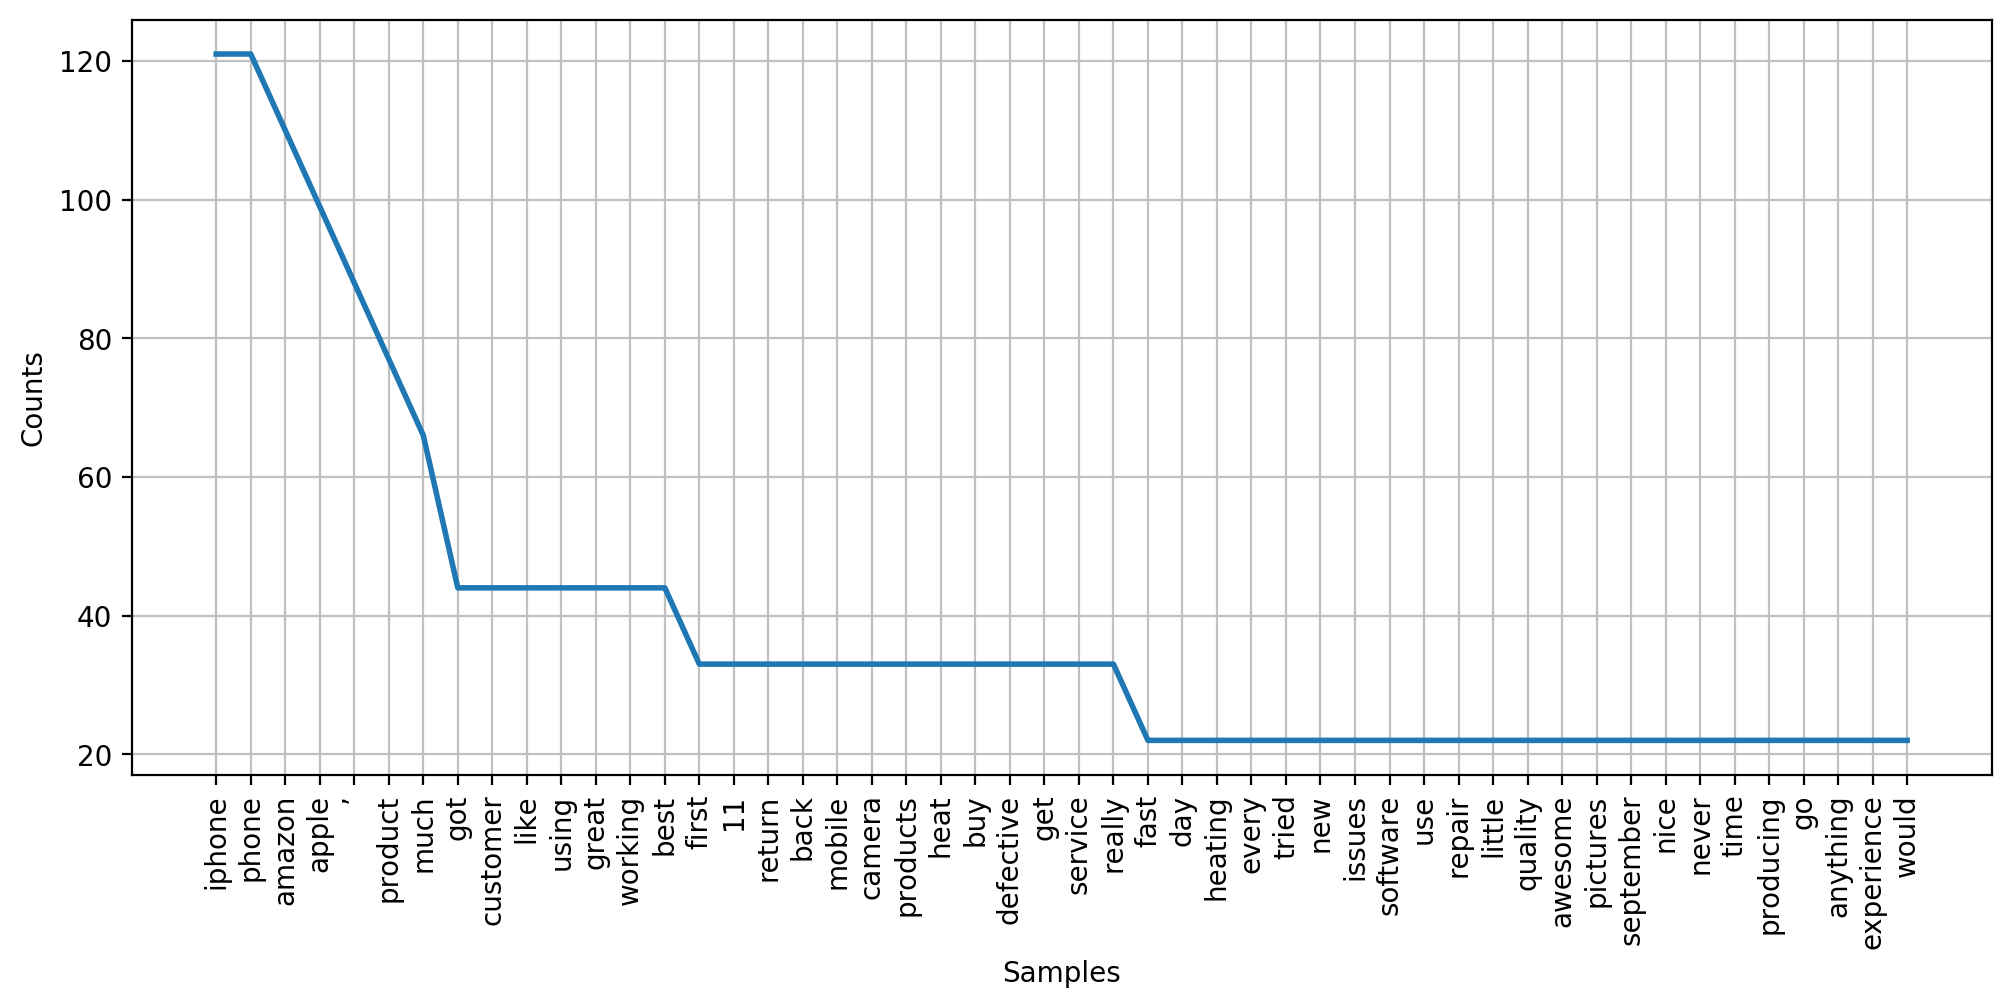

In [44]:
fig,ax = plt.subplots(figsize=(12,5), dpi=200)
freq_dist.plot(50)

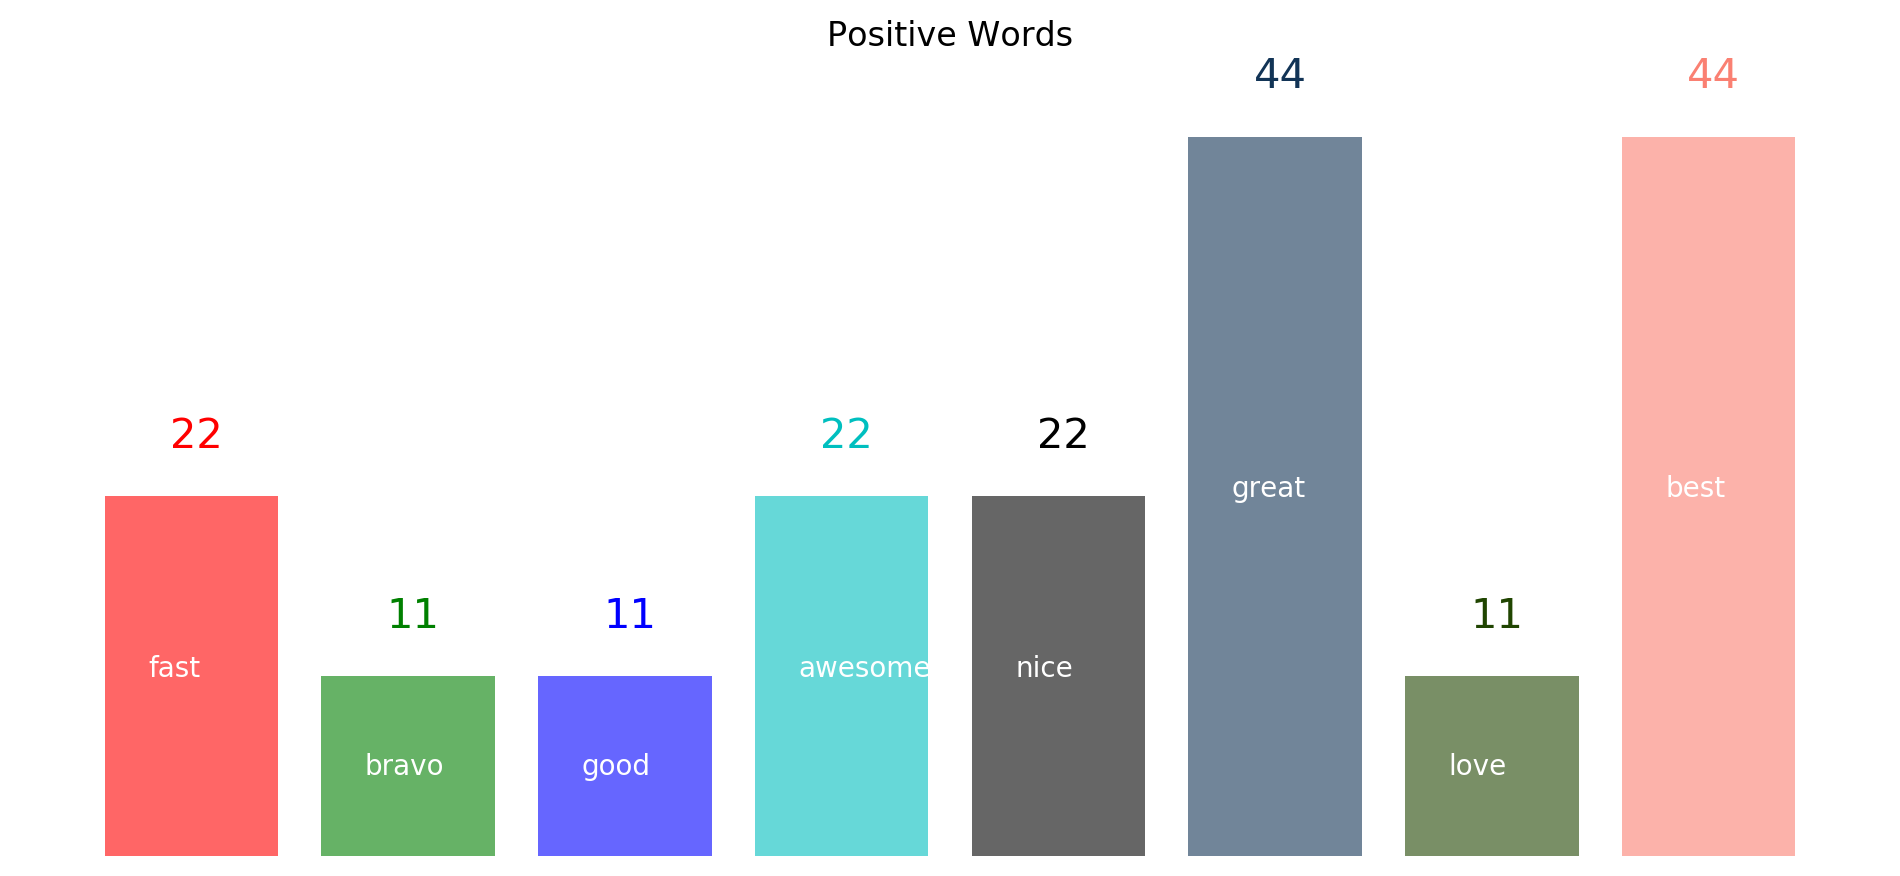

In [28]:
fig, ax=plt.subplots(figsize=(12,5),dpi=200)

c=['r','g','b','c','k','#123456','#204501','salmon','m','y','#024254','#567555']
ax.bar(most_common.keys(), most_common.values(), color=['r','g','b','c','k','#123456','#204501','salmon','m','y','#024254','#567555'], alpha=0.6, label='Sentiments')
    
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)
    
for cc,t in zip(c,ax.get_xticklabels()):
    t.set_color(cc)
    
for name,cc,p in zip(mo.keys(), c, ax.patches):
    xpos = p.get_x()
    ypos = p.get_height()
    text = f"{ypos}"
    ax.text(xpos+0.3,ypos+3,text,fontsize=15,color=cc)
    ax.text(xpos+0.2,ypos//2,name,fontsize=10,color='white')
    
ax.set_title('Positive Words', pad=20)
ax.set_yticks([])
ax.set_xticks([])
plt.show()

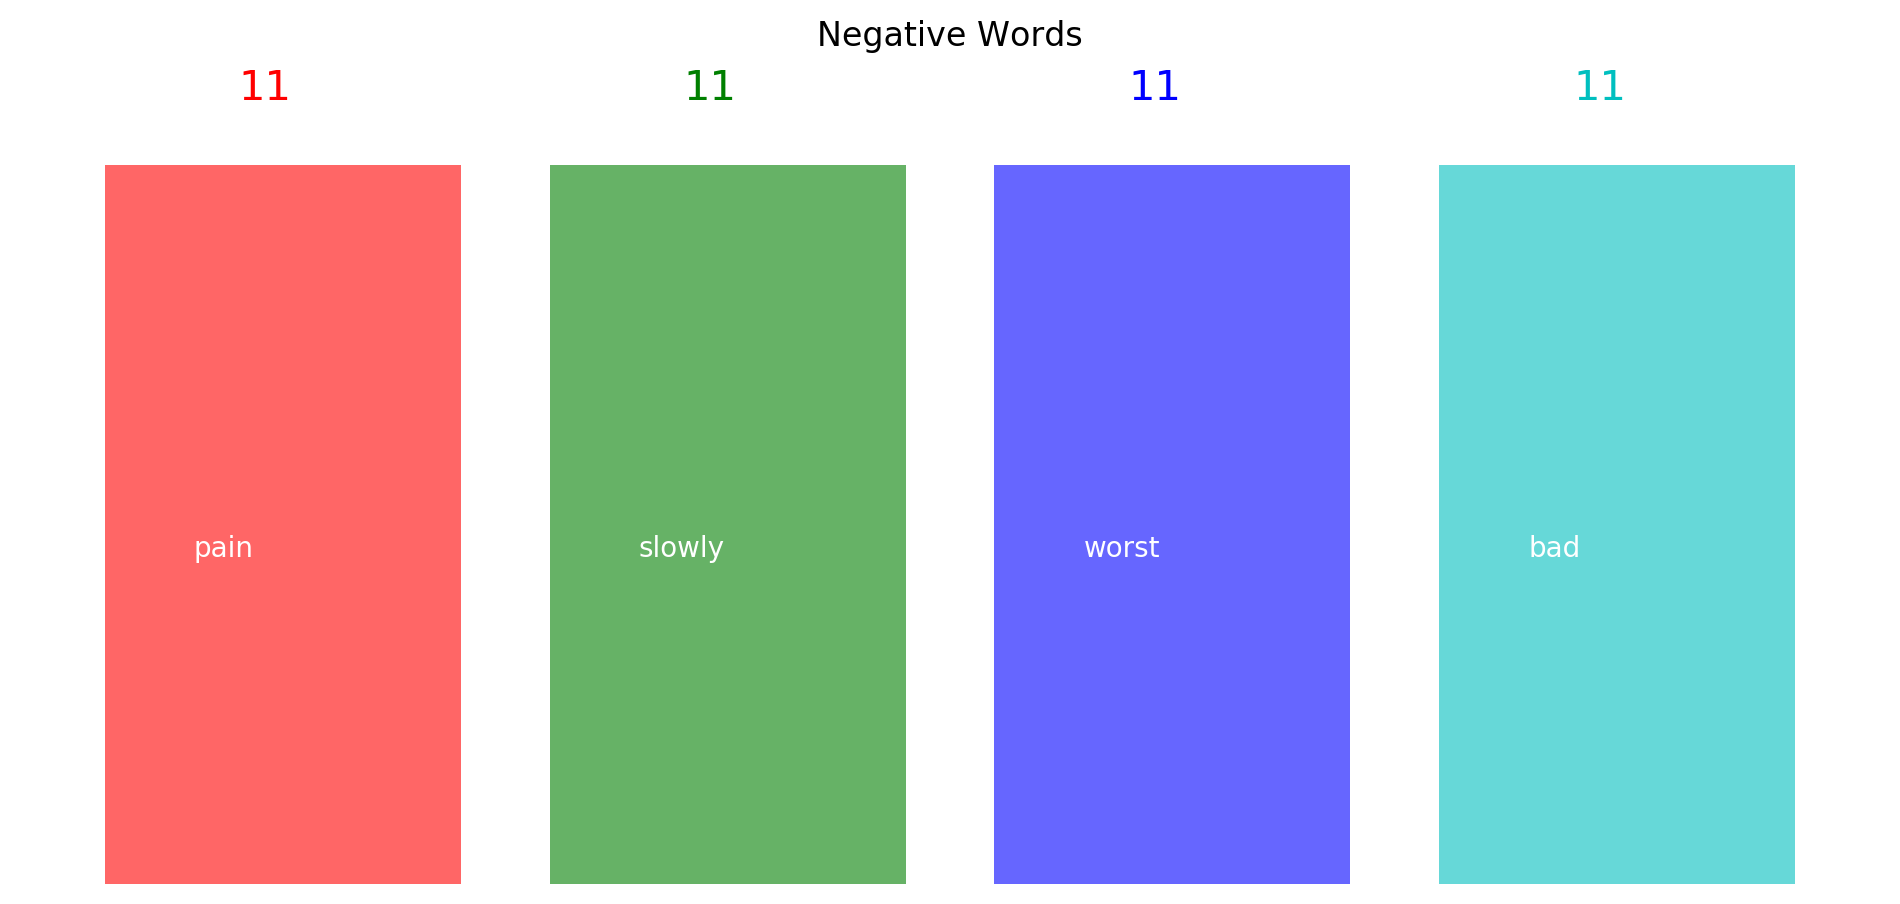

In [29]:
fig, ax=plt.subplots(figsize=(12,5),dpi=200)

c=['r','g','b','c','k','#123456','#204501','salmon','m','y','#024254','#567555']
ax.bar(bad_w.keys(), bad_w.values(), color=['r','g','b','c','k','#123456','#204501','salmon','m','y','#024254','#567555'], alpha=0.6, label='Sentiments')
    
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)
    
for cc,t in zip(c,ax.get_xticklabels()):
    t.set_color(cc)
    
for name,cc,p in zip(bad_w.keys(), c, ax.patches):
    xpos = p.get_x()
    ypos = p.get_height()
    text = f"{ypos}"
    ax.text(xpos+0.3,ypos+1,text,fontsize=15,color=cc)
    ax.text(xpos+0.2,ypos//2,name,fontsize=10,color='white')
    
ax.set_title('Negative Words', pad=30)
ax.set_yticks([])
ax.set_xticks([])
plt.show()

In [47]:
def starstype(star):
    if star<3:
        return "Not satisfied"
    elif star==3:
        return "partially satisfied"
    else:
        return "Full Satisfaction"

In [48]:
product_df['satisfaction']=product_df['stars'].apply(starstype)
product_df

,name,review title,reviews,stars,satisfaction
0,Suman Biswas,Keep away from Amazon when it's Apple.,May be my first negative review about the prod...,1.0,Not satisfied
1,Sunny Kumar,First Time iPhone User Review :-),The iPhone design is good and the camera quali...,5.0,Full Satisfaction
2,shanu Kumar,Solid premium phone from iphone,Awesome Phone. Nice upgrade from iPhone 6s to ...,5.0,Full Satisfaction
3,Amazon Customer,Worst Experience Ever.!,My Phone is Producing Too Much Heat Even Didn’...,1.0,Not satisfied
4,Satyapal singh,iPhone 11,"Defective product,got heat up within 5 minutes...",1.0,Not satisfied
...,...,...,...,...,...
83,Amazon Customer,Worst Experience Ever.!,My Phone is Producing Too Much Heat Even Didn’...,1.0,Not satisfied
84,Satyapal singh,iPhone 11,"Defective product,got heat up within 5 minutes...",1.0,Not satisfied
85,Gurmeet singh,Defective Iphone 11,The product i got was defective . The face id ...,1.0,Not satisfied
86,Ghar Sayan,Best iPhone ever | Super Night Mode | Super Ca...,"In my opinion, don’t think much about the pho...",5.0,Full Satisfaction


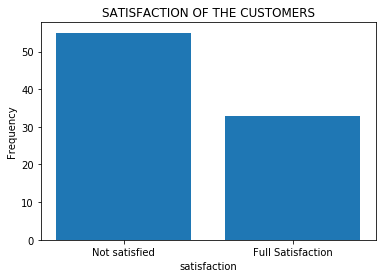

In [49]:
data = product_df['satisfaction'].value_counts() # category
label =list(data.index)
freq = data.values
fig, ax = plt.subplots()
ax.bar(label, freq)
ax.set_xlabel('satisfaction')
ax.set_ylabel('Frequency')
plt.title("SATISFACTION OF THE CUSTOMERS")
plt.show()

### WordCloud from collected Reviews

In [50]:
from wordcloud import WordCloud, STOPWORDS

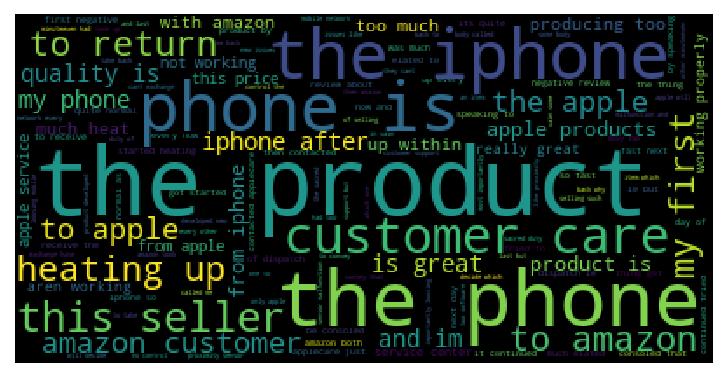

In [51]:
wc = WordCloud( background_color='black', stopwords=STOPWORDS).generate(reviews_string)
plt.figure(dpi=150)
plt.imshow(wc)
plt.xticks([])
plt.yticks([])
ax = plt.gca()
for sp in ax.spines:
    ax.spines[sp].set_visible(False)
plt.show()

### WordCloud from Review Title 

In [52]:
rt_string = ' '.join(map(str, reviews_title))
rt_string

"Keep away from Amazon when it's Apple. First Time iPhone User Review :-) Solid premium phone from iphone Worst Experience Ever.! iPhone 11 Defective Iphone 11 Best iPhone ever | Super Night Mode | Super Camera | Yellow Don’t buy it from this seller Keep away from Amazon when it's Apple. First Time iPhone User Review :-) Solid premium phone from iphone Worst Experience Ever.! iPhone 11 Defective Iphone 11 Best iPhone ever | Super Night Mode | Super Camera | Yellow Don’t buy it from this seller Keep away from Amazon when it's Apple. First Time iPhone User Review :-) Solid premium phone from iphone Worst Experience Ever.! iPhone 11 Defective Iphone 11 Best iPhone ever | Super Night Mode | Super Camera | Yellow Don’t buy it from this seller Keep away from Amazon when it's Apple. First Time iPhone User Review :-) Solid premium phone from iphone Worst Experience Ever.! iPhone 11 Defective Iphone 11 Best iPhone ever | Super Night Mode | Super Camera | Yellow Don’t buy it from this seller Kee

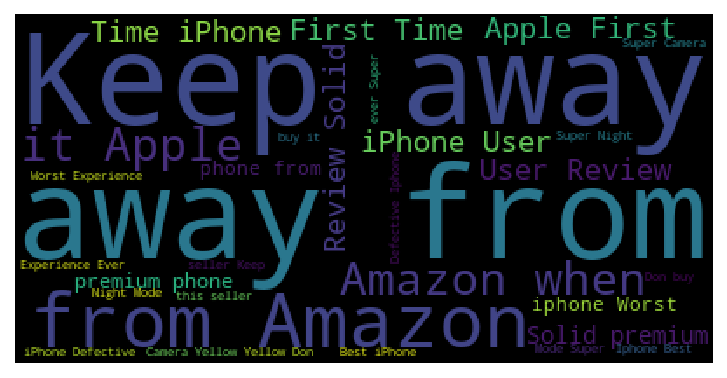

In [54]:
wc = WordCloud( background_color='black', stopwords=STOPWORDS).generate(rt_string)
plt.figure(dpi=150)
plt.imshow(wc)
plt.xticks([])
plt.yticks([])
ax = plt.gca()
for sp in ax.spines:
    ax.spines[sp].set_visible(False)
plt.show()